# ガウス-ガンマ分布の作図

- 執筆期間：2022/02/03 - 2022/02/03

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-02-03 19:45


# ガウス-ガンマ分布の作図

　ガウス-ガンマ分布(Gaussian-Gamma Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import norm, gamma # 1次元ガウス分布, ガンマ分布
import scipy.special as sp # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。不要であれば省略してください。  
<br>

## 定義式の確認

　まずは、ガウス-ガンマ分布の定義式を確認します。「1次元ガウス分布の作図」と「ガンマ分布の作図」も参照してください。  
<br>

　ガウス-ガンマ分布は、1次元ガウス分布とガンマ分布の積で定義される$\mu, \lambda$の同時分布です。

$$
\begin{aligned}
\mathrm{NG}(\mu, \lambda | m, \beta, a, b)
   &= \mathcal{N}(\mu | m, (\beta \lambda)^{-1})
      \mathrm{Gam}(\lambda | a, b)
\\
   &= \frac{1}{\sqrt{2 \pi (\beta \lambda)^{-1}}}
      \exp \left(
          - \frac{\beta \lambda}{2}
            (\mu - m)^2
      \right)
      \frac{b^a}{\Gamma(a)}
      \lambda^{a-1} \exp(- b \lambda)
\end{aligned}
$$

　ここで、$\mathcal{N}(\cdot)$はガウス分布、$\mathrm{Gam}(\cdot)$はガンマ分布を表します。$m$は1次元ガウス分布の平均パラメータ、$\beta \lambda$は精度パラメータです。精度の逆数$\frac{1}{\beta \lambda}$が分散パラメータで、その平方根$\sqrt{\frac{1}{\beta \lambda}}$が標準偏差になります。また、$\lambda$はガンマ分布の変数でもあり、$a, b$はガンマ分布のパラメータです。  
　確率変数の値$\mu$は実数、$\lambda$は0より大きい値$\lambda > 0$となります。パラメータ$\lambda, \beta, a, b$は、0より大きい値$\lambda > 0, \beta > 0, a > 0, b > 0$を満たす必要があります。  

　この式の対数をとると、次の式になります。

$$
\begin{aligned}
\log \mathrm{NG}(\mu, \lambda | m, \beta, a, b)
   &= \log \mathcal{N}(\mu | m, (\beta \lambda)^{-1})
      + \log \mathrm{Gam}(\lambda | a, b)
\\
   &= - \frac{1}{2} \Bigl\{
          \beta \lambda
          (x - m)^2
          - \log(\beta \lambda)
          + \log(2 \pi)
      \Bigr\} \\
   &\quad
      + (a - 1) \log \lambda
      - b \lambda
      + a \log b
      - \log \Gamma(a)
\end{aligned}
$$

　ガウス-ガンマ分布の$\mu$の平均と分散は、定義より次となります。

$$
\begin{aligned}
\mathbb{E}[\mu]
   &= m
\\
\mathbb{V}[\mu]
   &= (\beta \lambda)^{-1}
    = \frac{1}{\beta \lambda}
\end{aligned}
$$

　また、$\lambda$の平均・分散・最頻値は、次の式で計算できます。

$$
\begin{aligned}
\mathbb{E}[\lambda]
   &= \frac{a}{b}
\\
\mathbb{V}[\lambda]
   &= \frac{a}{b^2}
\\
\mathrm{mode}[\lambda]
   &= \frac{a - 1}{b}
\end{aligned}
$$

<br>

　ガウス-ガンマ分布は、1次元ガウス分布の事前分布として利用されます。  
<br>

## 確率密度の計算

　ガウス-ガンマ分布に従う確率密度を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# 1次元ガウス分布の平均パラメータを指定
m = 0.0

# 1次元ガウス分布の精度パラメータの係数を指定
beta = 2.0

# ガンマ分布のパラメータを指定
a = 5.0
b = 6.0

# 確率変数の値を指定
mu = 1.5
lmd = 2.5

　1次元ガウス分布の平均パラメータ$m$、精度パラメータの係数$\beta > 0$、ガンマ分布のパラメータ$a > 0, b > 0$、確率変数がとり得る値$\mu$、$\lambda > 0$を指定します。設定した値に対する確率密度を計算します。  

　まずは、定義式から確率密度を計算します。

In [4]:
# 定義式により確率密度を計算
C_N = 1 / np.sqrt(2.0 * np.pi / beta / lmd)
dens_N = C_N * np.exp(-0.5 * beta * lmd * (mu - m)**2)
C_Gam = b**a / sp.gamma(a)
dens_Gam = C_Gam * lmd**(a - 1.0) * np.exp(-b * lmd)
dens = dens_N * dens_Gam
print(dens)

1.2455937592281846e-05


　1次元ガウス分布

$$
\begin{aligned}
C_{\mathcal{N}}
   &= \frac{1}{\sqrt{2 \pi (\beta \lambda)^{-1}}}
\\
\mathcal{N}(\mu | m, (\beta \lambda)^{-1})
   &= C_{\mathcal{N}}
      \exp \left(
          - \frac{\beta \lambda}{2}
            (\mu - m)^2
      \right)
\end{aligned}
$$

と、ガンマ分布

$$
\begin{aligned}
C_{\mathrm{Gam}}
   &= \frac{b^a}{\Gamma(a)}
\\
\mathrm{Gam}(\lambda | a, b)
   &= C_{\mathrm{Gam}}
      \lambda^{a-1} \exp(- b \lambda)
\end{aligned}
$$

をそれぞれ計算して、2つの積

$$
\begin{aligned}
\mathrm{NG}(\mu, \lambda | m, \beta, a, b)
   &= \mathcal{N}(\mu | m, (\beta \lambda)^{-1})
      \mathrm{Gam}(\lambda | a, b)
\end{aligned}
$$

を求めます。$C_{\mathcal{N}}$は1次元ガウス分布の正規化係数、$C_{\mathrm{Gam}}$は、ガンマ分布の正規化係数です。また、$\pi$は円周率です。  
　$\Gamma(x)$はガンマ関数で、`SciPy`ライブラリの`special`モジュールの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率密度を計算
log_C_N = -0.5 * (np.log(2.0 * np.pi) - np.log(beta * lmd))
log_dens_N = log_C_N - 0.5 * beta * lmd * (mu - m)**2
log_C_Gam = a * np.log(b) - sp.loggamma(a)
log_dens_Gam = log_C_Gam + (a - 1.0) * np.log(lmd) - b * lmd
log_dens = log_dens_N + log_dens_Gam
dens = np.exp(log_dens)
print(dens)
print(log_dens)

1.2455937592281847e-05
-11.293313133698673


　対数をとった1次元ガウス分布

$$
\begin{aligned}
\log C_{\mathcal{N}}
   &= - \frac{1}{2} \Bigl\{
          \log (2 \pi)
          - \log (\beta \lambda)
      \Bigr\}
\\
\log \mathcal{N}(\mu | m, (\beta \lambda)^{-1})
   &= \log C_{\mathcal{N}}
      - \frac{\beta \lambda}{2}
        (\mu - m)^2
\end{aligned}
$$

と、対数をとったガンマ分布

$$
\begin{aligned}
\log C_{\mathrm{Gam}}
   &= a \log b - \log \Gamma(a)
\\
\log \mathrm{Gam}(\lambda | a, b)
   &= \log C_{\mathrm{Gam}}
      + (a - 1) \log \lambda
      - b \lambda
\end{aligned}
$$

の和

$$
\log \mathrm{NG}(\mu, \lambda | m, \beta, a, b)
    = \log \mathcal{N}(\mu | m, (\beta \lambda)^{-1})
      + \log \mathrm{Gam}(\lambda | a, b)
$$

を計算します。計算結果の指数をとると確率が得られます。

$$
\mathrm{NG}(\mu, \lambda | m, \beta, a, b)
    = \exp \Bigr(
          \log \mathrm{NG}(\mu, \lambda | m, \beta, a, b)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　1次元ガウス分布のモジュール`norm`とガンマ分布のモジュール`gamma()`の確率密度メソッド`pdf()`を使って計算します。

In [6]:
# ガウス分布とガンマ分布の関数により確率密度を計算
dens_N = norm.pdf(x=mu, loc=m, scale=np.sqrt(1.0 / beta / lmd))
dens_Gam = gamma.pdf(x=lmd, a=a, scale=1.0 / b)
dens = dens_N * dens_Gam
print(dens)

1.2455937592281844e-05


　`norm.pdf()`の変数の引数`x`に`mu`、平均の引数`loc`に`m`、標準偏差の引数`scale`に精度`beta * lmd`の逆数(分散)`1.0 / beta / lmd`の平方根(標準偏差)を指定します。平方根は`np.sqrt()`で計算できます。  
　`gamma.pdf()`の変数の引数`x`に`lmd`、形状の引数`a`に`a`、尺度の引数`scale`に`b`の逆数`1.0 / b`を指定します。  

　`logpdf()`だと対数をとった確率密度を計算します。

In [7]:
# ガウス分布とガンマ分布の対数をとった関数により確率密度を計算
log_dens_N = norm.logpdf(x=mu, loc=m, scale=np.sqrt(1.0 / beta / lmd))
log_dens_Gam <- gamma.logpdf(x=lmd, a=a, scale=1.0 / b)
log_dens = log_dens_N + log_dens_Gam
dens = np.exp(log_dens)
print(dens)
print(log_dens)

1.2455937592281825e-05
-11.293313133698675


　計算結果の指数をとると確率密度が得られます。  
<br>

## 統計量の計算

　ガウス-ガンマ分布の平均と分散を計算します。  
<br>

　平均を計算します。

In [8]:
# 計算式により平均を計算
E_mu = m
E_lambda = a / b
print(E_mu)
print(E_lambda)

0.0
0.8333333333333334


　1次元ガウス分布($\mu$)とガンマ分布($\lambda$)の平均は、次の式で計算できます。

$$
\begin{aligned}
\mathbb{E}[\mu]
   &= m
\\
\mathbb{E}[\lambda]
   &= \frac{a}{b}
\end{aligned}
$$

　分散を計算します。

In [9]:
# 計算式により分散を計算
V_mu = 1.0 / beta / E_lambda
V_lambda = a / b**2
print(V_mu)
print(V_lambda)

0.6
0.1388888888888889


　1次元ガウス分布($\mu$)とガンマ分布($\lambda$)の分散は、次の式で計算できます。

$$
\begin{aligned}
\mathbb{V}[\mu]
   &= \frac{1}{\beta \lambda}
\\
\mathbb{V}[\lambda]
   &= \frac{a}{b^2}
\end{aligned}
$$

　最頻値を計算します。

In [10]:
# 計算式により最頻値を計算
mode_lambda = (a - 1.0) / b
print(mode_lambda)

0.6666666666666666


　ガンマ分布($\lambda$)の最頻値は、次の式で計算できます。

$$
\mathrm{mode}[\lambda]
    = \frac{a - 1}{b}
$$

　各分布のモジュールの平均メソッド`mean()`でも平均を計算できます。

In [11]:
# 関数により平均を計算
E_mu = norm.mean(loc=m)
E_lambda = gamma.mean(a=a, scale=1.0 / b)
print(E_mu)
print(E_lambda)

0.0
0.8333333333333333


　確率メソッドと同様に引数を指定します。  

　分散メソッド`var()`で分散を計算します。

In [12]:
# 関数により分散を計算
V_mu = norm.var(scale=np.sqrt(1.0 / beta / E_lambda))
V_lambda = gamma.var(a=a, scale=1.0 / b)
print(V_mu)
print(V_lambda)

0.6000000000000001
0.13888888888888887


　こちらも同様に引数を指定します。  
<br>

## 分布の可視化

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用してガウス-ガンマ分布のグラフを作成します。  
<br>

　作図に利用する$\mu, \lambda$の値を設定します。

In [13]:
# 1次元ガウス分布の平均パラメータを指定
m = 0.0

# 1次元ガウス分布の精度パラメータの係数を指定
beta = 2.0

# ガンマ分布のパラメータを指定
a = 5.0
b = 6.0

# 作図用のmuの値を作成
mu_vals = np.linspace(start=-3.0, stop=3.0, num=200)
print(mu_vals[:5])

# 作図用のlambdaの値を作成
lambda_vals = np.linspace(start=0.01, stop=2.0, num=200)
print(lambda_vals[:5])

[-3.         -2.96984925 -2.93969849 -2.90954774 -2.87939698]
[0.01 0.02 0.03 0.04 0.05]


　$\mu$がとり得る値を作成して`mu_vals`とします。この例では、`-3`から`3`を範囲とします。  
　$\lambda$がとり得る値を作成して`lambda_vals`とします。この例では、`0.01`から`2`を範囲とします。  

　作図用の点$(\mu, \lambda)$を作成します。

In [14]:
# 作図用のmuとlambdaの点を作成
mu_grid, lambda_grid = np.meshgrid(mu_vals, lambda_vals)
print(mu_grid.flatten()[:5])
print(lambda_grid.flatten()[:5])

[-3.         -2.96984925 -2.93969849 -2.90954774 -2.87939698]
[0.01 0.01 0.01 0.01 0.01]


　`np.meshgrid()`を使って、`mu_vals, lambda_vals`それぞれの値に対して、全ての組み合わせを持つ(格子状の点となる)ように値を複製します。  
　`mu_grid, lambda_grid`の同じ位置の要素が1つの点$(\mu, \lambda)$に対応します。  

　ガウス-ガンマ分布の確率変数がとり得る値$\mu, \lambda$ごとの確率密度を計算します。

In [15]:
# 1次元ガウス分布を計算
density_N = norm.pdf(
    x=mu_grid.flatten(), loc=m, scale=np.sqrt(1.0 / beta / lambda_grid.flatten())
)

# ガンマ分布を計算
density_Gam = gamma.pdf(x=lambda_grid.flatten(), a=a, scale=1.0 / b)

# ガウス-ガンマ分布を計算
density = density_N * density_Gam
print(density[:5])

[1.57335202e-07 1.57618653e-07 1.57899744e-07 1.58178460e-07
 1.58454788e-07]


　`mu_grid, lambda_grid`の各要素に対応する確率密度を求めます。  

　ガウス-ガンマ分布の等高線図を作成します。

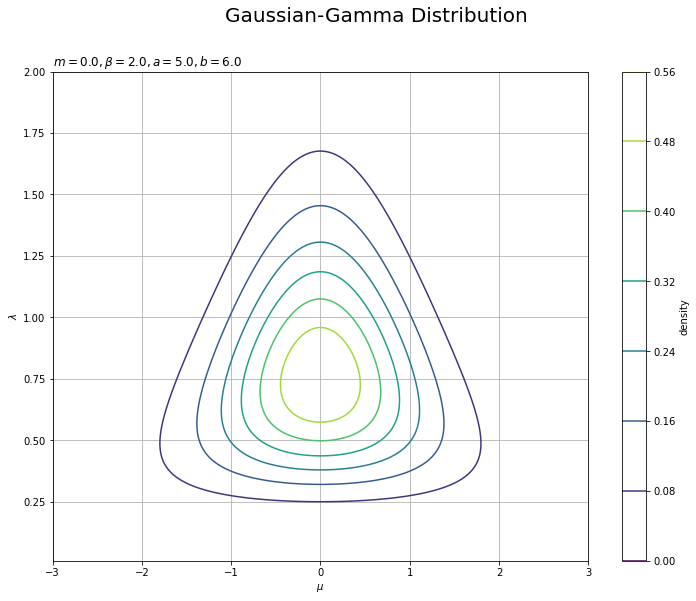

In [16]:
# ガウス-ガンマ分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape)) # 等高線図
plt.xlabel('$\mu$') # x軸ラベル
plt.ylabel('$\lambda$') # y軸のラベル
plt.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$m=' + str(m)+ ', \\beta=' + str(beta) + 
          ', a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.colorbar(label='density') # カラーバー
plt.grid() # グリッド線
plt.show() # 描画

<br>

　3Dグラフを作成します。

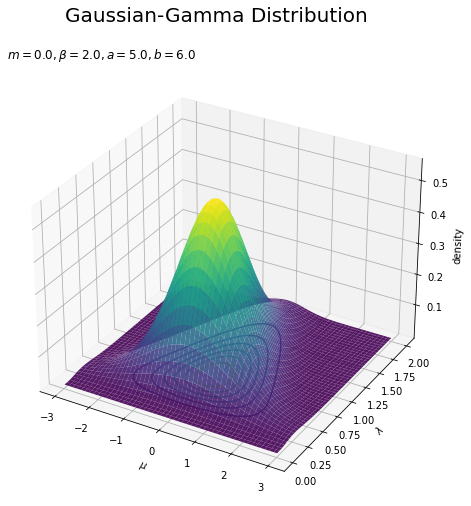

In [17]:
# ガウス-ガンマ分布を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(mu_grid, lambda_grid, density.reshape(mu_grid.shape), cmap='viridis', alpha=0.9) # 曲面図
ax.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape), offset=0.0) # 等高線図
ax.set_xlabel('$\mu$') # x軸ラベル
ax.set_ylabel('$\lambda$') # y軸ラベル
ax.set_zlabel('density') # z軸ラベル
ax.set_title('$m=' + str(m)+ ', \\beta=' + str(beta) + 
          ', a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
fig.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル
plt.show() # 描画

<br>

　等高線図に平均と最頻値、標準偏差の情報を重ねて表示します。

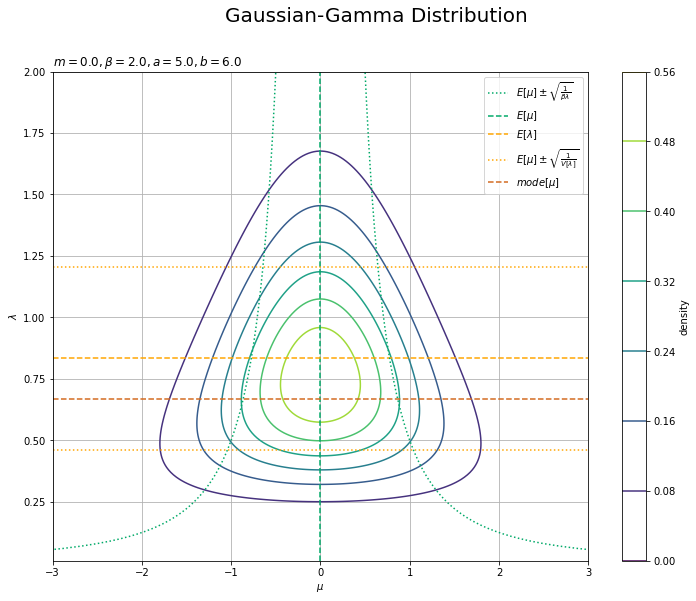

In [18]:
# 統計量を計算
E_mu = m
E_s_mu = np.sqrt(1 / beta / E_lambda)
s_mu_vals = np.sqrt(1.0 / beta / lambda_vals)
E_lambda = a / b
s_lambda = np.sqrt(a / b**2)
mode_lambda = (a - 1.0) / b

# 統計量を重ねたガウス-ガンマ分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape)) # 分布
plt.vlines(x=E_mu, ymin=lambda_vals.min(), ymax=lambda_vals.max(), color='#00A968', linestyle='--', label='$E[\mu]$') # 平均
plt.plot(E_mu-s_mu_vals, lambda_vals, color='#00A968', linestyle=':', label='$E[\mu] \pm \\sqrt{\\frac{1}{\\beta \lambda}}$') # 平均 - 標準偏差
plt.plot(E_mu+s_mu_vals, lambda_vals, color='#00A968', linestyle=':') # 平均 + 標準偏差
plt.hlines(y=E_lambda, xmin=mu_vals.min(), xmax=mu_vals.max(), color='orange', linestyle='--', label='$E[\lambda]$') # 平均
plt.hlines(y=E_lambda-s_lambda, xmin=mu_vals.min(), xmax=mu_vals.max(), color='orange', linestyle=':', label='$E[\mu] \pm \\sqrt{\\frac{1}{V[\lambda]}}$') # 平均 - 標準偏差
plt.hlines(y=E_lambda+s_lambda, xmin=mu_vals.min(), xmax=mu_vals.max(), color='orange', linestyle=':') # 平均 + 標準偏差
plt.hlines(y=mode_lambda, xmin=mu_vals.min(), xmax=mu_vals.max(), color='chocolate', linestyle='--', label='$mode[\mu]$') # 最頻値
plt.xlabel('$\mu$') # x軸ラベル
plt.ylabel('$\lambda$') # y軸のラベル
plt.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$m=' + str(m)+ ', \\beta=' + str(beta) + 
          ', a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.colorbar(label='density') # カラーバー
plt.legend() # 凡例
plt.grid() # グリッド線
plt.xlim(xmin=mu_vals.min(), xmax=mu_vals.max()) # x軸の表示範囲
plt.show() # 描画

　ガンマ分布は、$\mu$の影響を受けない(定義式に$\mu$を含まない)ので、平均・標準偏差・最頻値は一定(水平線)になります。また、ガンマ分布は対称な形ではないので、平均(オレンジ色の破線)と最頻値(茶色の破線)が一致しません。オレンジ色の点線は、平均から標準偏差を足し引きした値です。  
　1次元ガウス分布の標準偏差は、$\lambda$の影響を受けます(計算式に$\lambda$を含みます)。よって、平均から標準偏差を足し引きした値(青緑色の点線)は$\lambda$(y軸)の値によって変化します。この曲線の影響を受けて、ガウス-ガンマ分布がおにぎり型になるのを確認できます。  

　ガウス-ガンマ分布のグラフを描画できました。続いて、1つの変数(各軸)$\mu, \lambda$に注目します。  
<br>

　$\lambda = \mathbb{E}[\lambda]$における1次元ガウス分布のグラフを作成します。

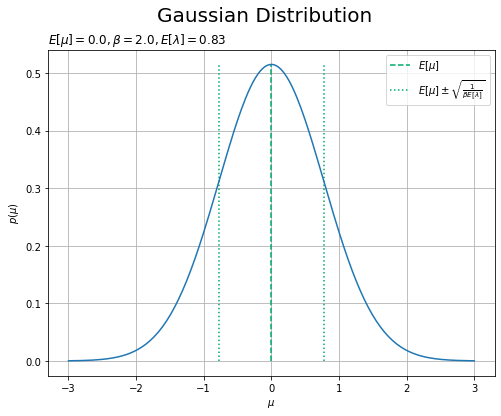

In [19]:
# 1次元ガウス分布を計算
density_N = norm.pdf(x=mu_vals, loc=m, scale=np.sqrt(1.0 / beta / E_lambda))

# 統計量を重ねた精度の期待値による1次元ガウス分布を作図
plt.figure(figsize=(8, 6)) # 図の設定
plt.plot(mu_vals, density_N) # 分布
plt.vlines(x=E_mu, ymin=0.0, ymax=density_N.max(), color='#00A968', linestyle='--', label='$E[\mu]$') # 平均
plt.vlines(x=E_mu-E_s_mu, ymin=0.0, ymax=density_N.max(), color='#00A968', linestyle=':', label='$E[\mu] \pm \\sqrt{\\frac{1}{\\beta E[\lambda]}}$') # 平均 + 標準偏差
plt.vlines(x=E_mu+E_s_mu, ymin=0.0, ymax=density_N.max(), color='#00A968', linestyle=':') # 平均 - 標準偏差
plt.xlabel('$\mu$') # x軸ラベル
plt.ylabel('$p(\mu)$') # y軸のラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$E[\mu]=' + str(E_mu)+ ', \\beta=' + str(beta) + ', E[\lambda]=' + str(np.round(E_lambda, 2)) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　この図は、ガウス-ガンマ分布を$\lambda$軸(y軸)が$\mathbb{E}[\lambda]$の点で切断した、断面図に対応します。  

　同様に、全ての$\lambda$における分布をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


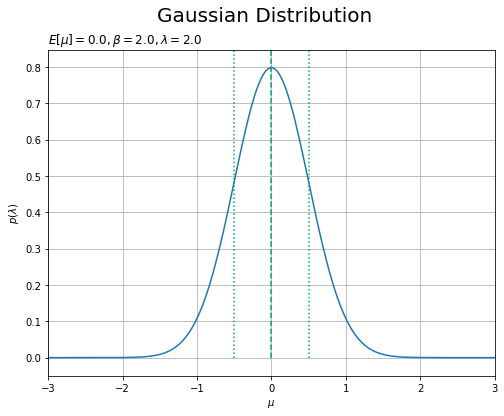

In [20]:
# y軸(確率密度)の最大値を設定
dens_max = np.max(norm.pdf(x=mu_vals, loc=m, scale=np.sqrt(1.0 / beta / lambda_vals.max()))) + 0.05

# 図を初期化
fig = plt.figure(figsize=(8, 6)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の平均パラメータを取得
    lmd = lambda_vals[i]
    s_mu = s_mu_vals[i]
    
    # 1次元ガウス分布を計算
    density_N = norm.pdf(x=mu_vals, loc=m, scale=np.sqrt(1.0 / beta / lmd))
    
    # 統計量を重ねた1次元ガウス分布を作図
    plt.plot(mu_vals, density_N) # 分布
    plt.vlines(x=E_mu, ymin=0.0, ymax=dens_max, color='#00A968', linestyle='--', label='$E[\mu]$') # 平均
    plt.vlines(x=E_mu-s_mu, ymin=0.0, ymax=dens_max, color='#00A968', linestyle=':', label='$E[\mu] \pm \\sqrt{\\frac{1}{\\beta \lambda}}$') # 平均 - 標準偏差
    plt.vlines(x=E_mu+s_mu, ymin=0.0, ymax=dens_max, color='#00A968', linestyle=':') # 平均 + 標準偏差
    plt.xlabel('$\mu$') # x軸ラベル
    plt.ylabel('$p(\lambda)$') # y軸ラベル
    plt.title('$E[\mu]=' + str(E_mu)+ ', \\beta=' + str(beta) + ', \lambda=' + str(np.round(lmd, 2)) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.xlim(xmin=mu_vals.min(), xmax=mu_vals.max()) # x軸の表示範囲
    plt.ylim(ymin=-0.05, ymax=dens_max) # y軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=len(lambda_vals), interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/Gaussian_dens_N.gif')

　$\lambda$が大きくなるに従って、1次元ガウス分布の裾が狭くなり(山が細く高くなり)ます。これが、ガウス-ガンマ分布がおにぎり型になるのに対応します。  
　$\mu \pm \sigma$の点線が移動するのが、ガウス-ガンマ分布の$\mu \pm \sigma$の点線が曲線になるのに対応しています。  

　ガンマ分布のグラフを作成します。

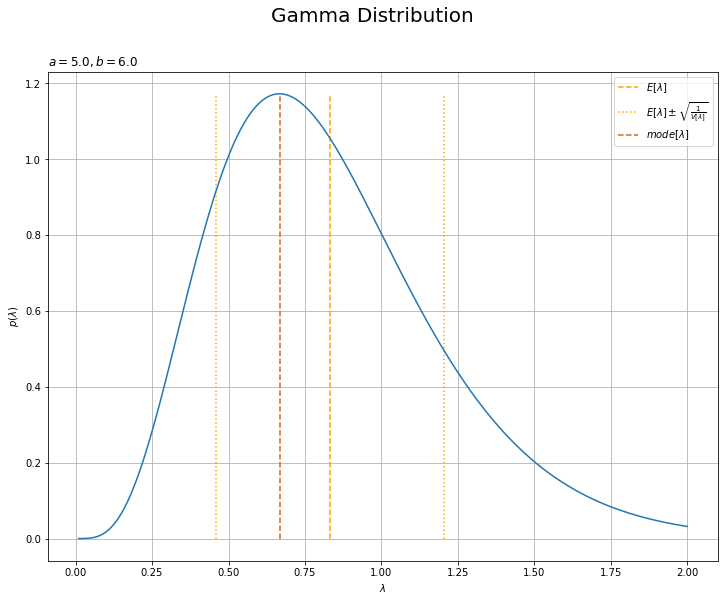

In [21]:
# ガンマ分布を計算
density_Gam = gamma.pdf(x=lambda_vals, a=a, scale=1.0 / b)

# 統計量を重ねたガンマ分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(lambda_vals, density_Gam) # 分布
plt.vlines(x=E_lambda, ymin=0.0, ymax=density_Gam.max(), color='orange', linestyle='--', label='$E[\lambda]$') # 平均
plt.vlines(x=E_lambda-s_lambda, ymin=0.0, ymax=density_Gam.max(), color='orange', linestyle=':', label='$E[\lambda] \pm \\sqrt{\\frac{1}{V[\lambda]}}$') # 平均 - 標準偏差
plt.vlines(x=E_lambda+s_lambda, ymin=0.0, ymax=density_Gam.max(), color='orange', linestyle=':') # 平均 + 標準偏差
plt.vlines(x=mode_lambda, ymin=0.0, ymax=density_Gam.max(), color='chocolate', linestyle='--', label='$mode[\lambda]$') # 最頻値
plt.xlabel('$\lambda$') # x軸ラベル
plt.ylabel('$p(\lambda)$') # y軸のラベル
plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a)+ ', b=' + str(b) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　ガウス-ガンマ分布をy軸側から見た図に対応します。  
　ガンマ分布は対称な形ではないので、平均(オレンジ色の破線)と最頻値(茶色の破線)が一致しないのを確認できます。  
<br>

## パラメータと分布の形状の関係

　パラメータが及ぼす分布への影響をアニメーション(gif画像)で可視化します。  
<br>

　パラメータの値を少しずつ変更して、分布の変化をアニメーションで確認します。

In [22]:
# パラメータとして利用する値を指定
m_vals = np.arange(start=-2.0, stop=2.1, step=0.1)
beta_vals = np.arange(start=0.1, stop=10.1, step=0.1)
a_vals = np.arange(start=0.1, stop=10.1, step=0.1)
b_vals = np.arange(start=0.1, stop=10.1, step=0.1)

# 固定するパラメータを指定
m = 0.0
beta = 2.0
a = 5.0
b = 6.0

# 作図用の変数の値を作成
mu_vals = np.linspace(start=-3.0, stop=3.0, num=100)
lambda_vals = np.linspace(start=0.01, stop=2.0, num=100)

# 作図用の変数の点を作成
mu_grid, lambda_grid = np.meshgrid(mu_vals, lambda_vals)

　各パラメータがとり得る値を作成して`*_vals`とします。  

　注目するパラメータ`*_vals`から順番に値を取り出して確率密度を計算して作図します。

MovieWriter ffmpeg unavailable; using Pillow instead.


41


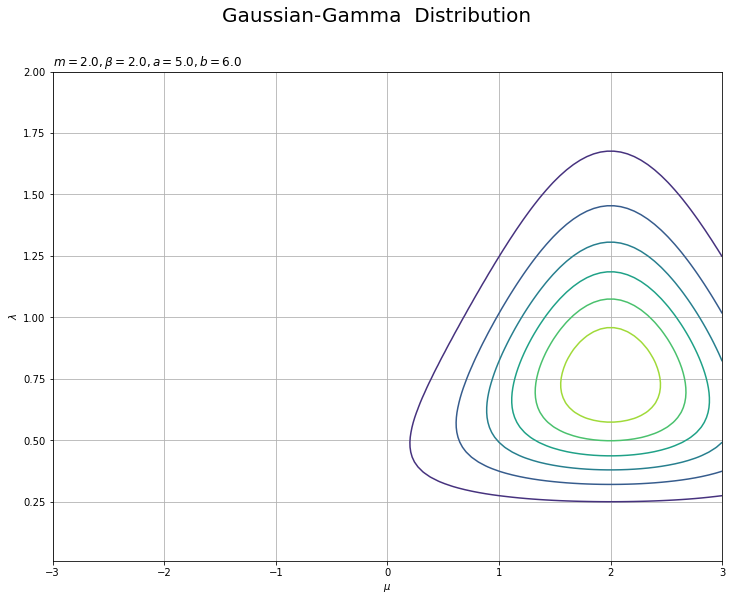

In [23]:
# フレーム数を設定
frame_num = len(m_vals)
#frame_num = len(beta_vals)
#frame_num = len(a_vals)
#frame_num = len(b_vals)
print(frame_num)

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gaussian-Gamma  Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    m = m_vals[i]
    #beta = beta_vals[i]
    #a = a_vals[i]
    #b = b_vals[i]
    
    # ガウス-ガンマ分布を計算
    density = norm.pdf(
        x=mu_grid.flatten(), loc=m, scale=np.sqrt(1.0 / beta / lambda_grid.flatten())
    )
    density *= gamma.pdf(x=lambda_grid.flatten(), a=a, scale=1.0 / b)
    
    # ガウス-ガンマ分布を作図
    plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape)) # 等高線図
    plt.xlabel('$\mu$') # x軸ラベル
    plt.ylabel('$\lambda$') # y軸のラベル
    plt.title('$m=' + str(np.round(m, 1)) + 
              ', \\beta=' + str(np.round(beta, 1)) + 
              ', a=' + str(np.round(a, 1)) + 
              ', b=' + str(np.round(b, 1)) + '$', loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/GaussianGamma_dens_cntr.gif')

<br>

　同様に、3Dグラフのアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


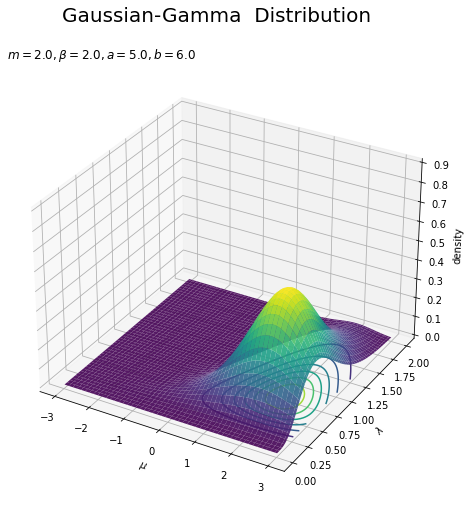

In [24]:
# z軸(確率密度)の最大値を設定
dens_max = 0.9

# 図を初期化
fig = plt.figure(figsize=(9, 8)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('Gaussian-Gamma  Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    m = m_vals[i]
    #beta = beta_vals[i]
    #a = a_vals[i]
    #b = b_vals[i]
    
    # ガウス-ガンマ分布を計算
    density = norm.pdf(
        x=mu_grid.flatten(), loc=m, scale=np.sqrt(1.0 / beta / lambda_grid.flatten())
    )
    density *= gamma.pdf(x=lambda_grid.flatten(), a=a, scale=1.0 / b)
    
    # ガウス-ガンマ分布を作図
    ax.plot_surface(mu_grid, lambda_grid, density.reshape(mu_grid.shape), cmap='viridis', alpha=0.9) # 曲面図
    ax.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape), offset=0.0) # 等高線図
    ax.set_xlabel('$\mu$') # x軸ラベル
    ax.set_ylabel('$\lambda$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    plt.title('$m=' + str(np.round(m, 1)) + 
              ', \\beta=' + str(np.round(beta, 1)) + 
              ', a=' + str(np.round(a, 1)) + 
              ', b=' + str(np.round(b, 1)) + '$', loc='left') # タイトル
    ax.set_zlim(zmin=0.0, zmax=dens_max) # z軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/GaussianGamma_dens_srfc.gif')

　$m$は$\mu$の平均なので、$m$が大きくなるに従って、$\mu$(x軸)の値が大きいほど確率密度が大きくなり(山が右に移動し)ます。  
　$\beta$は$\mu$の精度(分散)に影響するので、$\beta$が大きくなるに従って、$\mu$(x軸)における確率密度が大きい範囲が狭くなり(山が尖り)ます。  
　$a, b$は$\lambda$に対して影響します。$a$が大きくなるに従って、$\lambda$(y軸)が大きいほど確率密度が大きくなり、逆に$b$が大きくなるに従って、$\lambda$(y軸)が小さい(0に近い)ほど確率密度が大きくなります。  
<br>

## 乱数の生成

　ガウス-ガンマ分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、ガウス-ガンマ分布に従う乱数を生成します。

In [25]:
# 1次元ガウス分布の平均パラメータを指定
m = 0.0

# 1次元ガウス分布の精度パラメータの係数を指定
beta = 2.0

# ガンマ分布のパラメータを指定
a = 5.0
b = 6.0

# データ数(サンプルサイズ)を指定
N = 10000

# 精度パラメータを生成
lambda_n = np.random.gamma(shape=a, scale=1.0 / b, size=N)
print(lambda_n[:5])

# 平均パラメータを生成
mu_n = np.random.normal(loc=m, scale=np.sqrt(1.0 / beta / lambda_n), size=N)
print(mu_n[:5])

[0.7239288  0.74850355 0.88309352 1.08634408 0.31704171]
[-0.49935387 -0.67389563  0.06385534  0.83795177  0.41549688]


　ガンマ分布の乱数は、`NumPy`ライブラリの`random`モジュールのガンマ分布に従う乱数生成関数`gamma()`で生成できます。パラメータの引数`a, scale`に`a, 1.0 / b`、データ数(サンプルサイズ)の引数`size`に`N`を指定して、精度パラメータ$\lambda$を生成します。  
　$\lambda$のサンプル`lambda_n`を用いて、平均パラメータ$\mu$をサンプリングします。1次元ガウス分布の乱数は、`NumPy`ライブラリの`random`モジュールの1次元ガウス分布に従う乱数生成関数`normal()`で生成できます。平均の引数`loc`に`m`、標準偏差の引数`scale`に精度`beta * lambda_n`の逆数`1.0 / beta / lambda_n`の平方根、データ数(サンプルサイズ)の引数`size`に`N`を指定します。`N`個の乱数ごとに標準偏差が異なります。  

　作図に利用するため、$\mu, \lambda$の値と分布の配列を作成しておきます。

In [26]:
# 作図用のmuの値を作成
mu_vals = np.linspace(start=-3.0, stop=3.0, num=200)

# 作図用のlambdaの値を作成
lambda_vals = np.linspace(start=0.01, stop=2.0, num=200)

# 作図用のmu, lambdaの点を作成
mu_grid, lambda_grid = np.meshgrid(mu_vals, lambda_vals)

# 1次元ガウス分布を計算
density_N = norm.pdf(
    x=mu_grid.flatten(), loc=m, scale=np.sqrt(1.0 / beta / lambda_grid.flatten())
)

# ガンマ分布を計算
density_Gam = gamma.pdf(x=lambda_grid.flatten(), a=a, scale=1.0 / b)

# ガウス-ガンマ分布を計算
density = density_N * density_Gam

<br>

　サンプルの散布図を作成します。

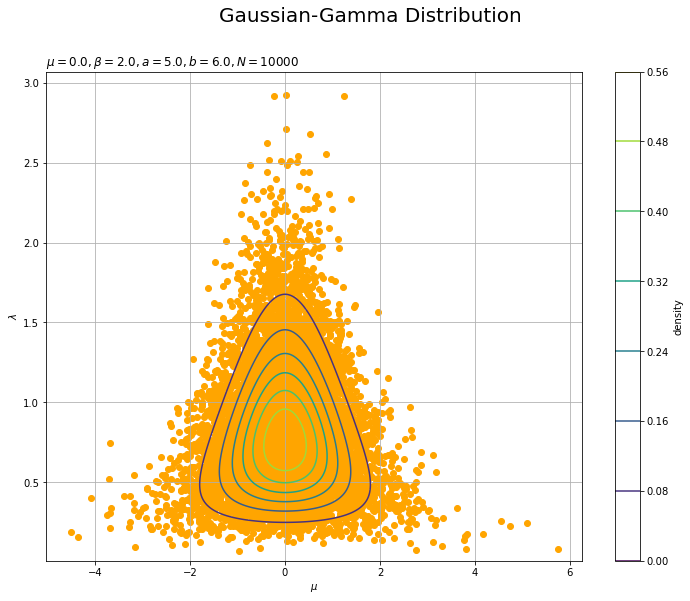

In [27]:
# サンプルの散布図を作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.scatter(x=mu_n, y=lambda_n, color='orange') # サンプル
plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape)) # 元の分布
plt.xlabel('$\mu$') # x軸ラベル
plt.ylabel('$\lambda$') # y軸のラベル
plt.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(m)+ ', \\beta=' + str(beta) + 
          ', a=' + str(a) + ', b=' + str(b) + 
          ', N=' + str(N) + '$', loc='left') # タイトル
plt.colorbar(label='density') # カラーバー
plt.grid() # グリッド線
plt.show() # 描画

<br>

　サンプルのヒストグラムを作成します。

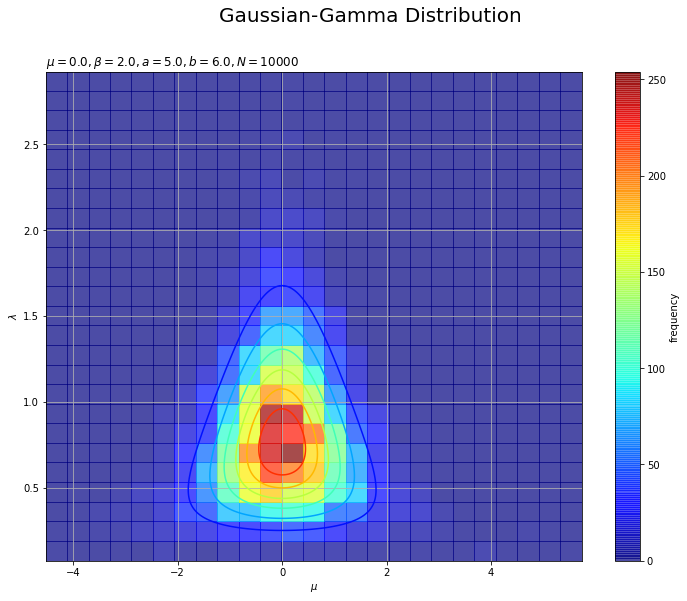

In [28]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape), cmap='jet', zorder=2) # 元の分布
plt.hist2d(x=mu_n, y=lambda_n, bins=25, cmap='jet', alpha=0.7, zorder=1) # ヒストグラム:(頻度)
plt.xlabel('$\mu$') # x軸ラベル
plt.ylabel('$\lambda$') # y軸のラベル
plt.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(m)+ ', \\beta=' + str(beta) + 
          ', a=' + str(a) + ', b=' + str(b) + 
          ', N=' + str(N) + '$', loc='left') # タイトル
plt.colorbar(label='frequency') # カラーバー
plt.grid() # グリッド線
plt.show() # 描画

　`pyplot.hist2d()`で2次元の変数に対するヒストグラムを描画できます。  

　データ数を指定して、サンプルを1つずつ増やしてヒストグラムの変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


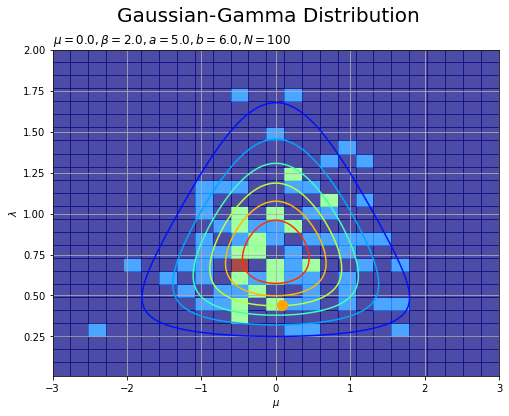

In [29]:
# フレーム数を指定
N_frame = 100

# y軸(頻度)の最大値を設定
freq_max = np.max(
    np.histogram2d(
        x=mu_n[:N_frame], y=lambda_n[:N_frame], 
        range=[[mu_grid.min(), mu_grid.max()], [lambda_grid.min(), lambda_grid.max()]], bins=25
    )[0]
)

# 図を初期化
fig = plt.figure(figsize=(8, 6)) # 図の設定
fig.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # サンプルのヒストグラムを作成
    plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape), cmap='jet', zorder=2) # 元の分布
    plt.hist2d(x=mu_n[:(n+1)], y=lambda_n[:(n+1)], 
               range=[[mu_grid.min(), mu_grid.max()], [lambda_grid.min(), lambda_grid.max()]], bins=25, 
               cmap='jet', vmin=0.0, vmax=freq_max, alpha=0.7, zorder=1) # ヒストグラム
    plt.scatter(x=mu_n[n], y=lambda_n[n], c='orange', s=100, zorder=3) # サンプル
    plt.xlabel('$\mu$') # x軸ラベル
    plt.ylabel('$\lambda$') # y軸のラベル
    plt.title('$\mu=' + str(m)+ ', \\beta=' + str(beta) + 
              ', a=' + str(a) + ', b=' + str(b) + 
              ', N=' + str(n + 1) + '$', loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/GaussianGamma_freq_each.gif')

<br>

　続いて、フレーム数を指定して、フレームごとに均等に分けたサンプルを増やしてヒストグラムの変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


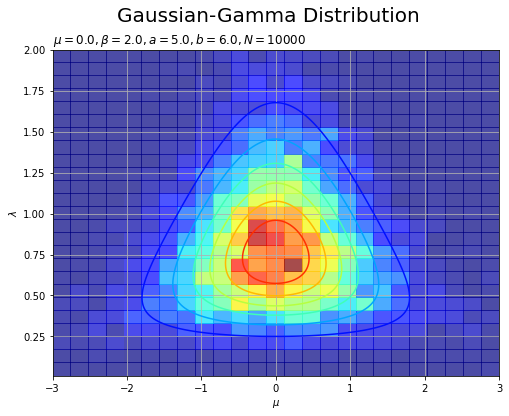

In [30]:
# フレーム数を指定
frame_num = 100

# 1フレーム当たりのデータ数を計算
n_per_frame = N // frame_num

# y軸(頻度)の最大値を設定
freq_max = np.max(
    np.histogram2d(
        x=mu_n, y=lambda_n, 
        range=[[mu_grid.min(), mu_grid.max()], [lambda_grid.min(), lambda_grid.max()]], bins=25
    )[0]
)

# 図を初期化
fig = plt.figure(figsize=(8, 6)) # 図の設定
fig.suptitle('Gaussian-Gamma Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # サンプルのヒストグラムを作成
    plt.contour(mu_grid, lambda_grid, density.reshape(mu_grid.shape), cmap='jet', zorder=2) # 元の分布
    plt.hist2d(x=mu_n[:(n+1)*n_per_frame], y=lambda_n[:(n+1)*n_per_frame], 
               range=[[mu_grid.min(), mu_grid.max()], [lambda_grid.min(), lambda_grid.max()]], bins=25, 
               cmap='jet', vmin=0.0, vmax=freq_max, alpha=0.7, zorder=1) # ヒストグラム
    plt.xlabel('$\mu$') # x軸ラベル
    plt.ylabel('$\lambda$') # y軸のラベル
    plt.title('$\mu=' + str(m)+ ', \\beta=' + str(beta) + 
              ', a=' + str(a) + ', b=' + str(b) + 
              ', N=' + str((n + 1)*n_per_frame) + '$', loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/GaussianGamma_freq_all.gif')

　サンプルが増えるに従って、元の分布に近付くのを確認できます。  
<br>

## 分布の生成

　ガウス-ガンマ分布が共役事前分布となる1次元ガウス分布のパラメータを生成して分布を作図します。  
<br>

　パラメータを$m, \beta, a, b$とするガウス-ガンマ分布

$$
\mathrm{NG}(\mu, \lambda | m, \beta, a, b)
    = \mathcal{N}(\mu | m, (\beta \lambda)^{-1})
      \mathrm{Gam}(\lambda | a, b)
$$

を事前分布として、$\mu, \lambda$を生成します。  
　生成した$\mu, \lambda$を用いて、平均$\mu$・精度$\lambda$の1次元ガウス分布

$$
\mathcal{N}(x | \mu, \lambda^{-1})
    = \frac{1}{\sqrt{2 \pi \lambda^{-1}}}
      \exp \left(
          - \frac{\lambda}{2}
            (x - \mu)^2
      \right)
$$

を描画します。  
<br>

　パラメータ$\mu, \lambda$を生成します。

In [31]:
# 1次元ガウス分布の平均パラメータを指定
m = 0.0

# 1次元ガウス分布の精度パラメータの係数を指定
beta = 2.0

# ガンマ分布のパラメータを指定
a = 5.0
b = 6.0

# サンプルサイズを指定
N = 10

# 精度パラメータを生成
lambda_n = np.random.gamma(shape=a, scale=1.0 / b, size=N)
print(lambda_n[:5])

# 平均パラメータを生成
mu_n = np.random.normal(loc=m, scale=np.sqrt(1.0 / beta / lambda_n), size=N)
print(mu_n[:5])

[0.65050754 0.33227317 0.59048818 0.44486243 0.98948482]
[ 1.20807856 -0.45730337  0.10772335 -0.46285233  1.12749315]


　ガンマ分布に従う乱数を生成して、精度パラメータ$\lambda$として利用します。  
　$\lambda$のサンプル`lambda_n`を用いて、平均パラメータ$\mu$をサンプリングします。  

　まずは、目安となるように$\mu, \lambda$の期待値$\mathbb{E}[\mu], \mathbb{E}[\lambda]$による分布を求めます。

In [32]:
# パラメータの期待値を計算
E_mu = m
E_lambda = a / b
E_sigma = np.sqrt(1.0 / E_lambda)

# 作図用のxの点を作成
x_vals = np.linspace(start=E_mu - E_sigma*5.0, stop=E_mu + E_sigma*5.0, num=200)

# 期待値による1次元ガウス分布を計算
E_dens = norm.pdf(x=x_vals, loc=E_mu, scale=E_sigma)

　平均パラメータの期待値$\mathbb{E}[\mu] = m$を`E_mu`、精度パラメータの期待値$\mathbb{E}[\lambda] = \frac{a}{b}$を`E_lambda`とします。  
　また、標準偏差パラメータの期待値$\mathbb{E}[\sigma] = \sqrt{\frac{1}{\mathbb{E}[\lambda]}}$を計算して`E_sigma`とします。  

　$x$として利用する値を作成して`x_vals`とします。この例では、平均`E_mu`を中心に標準偏差`E_sigma`の`5`倍を範囲とします。  
　`norm.pdf()`で1次元ガウス分布の確率密度を計算します。変数の引数`x`に`x_vals`、平均の引数`loc`に`E_mu`、標準偏差の引数`scale`に`E_sigma`を指定します。  

　パラメータのサンプル`mu_n, lambda_n`の値ごとに分布を計算して、$N + 1$個の1次元ガウス分布を作図します。

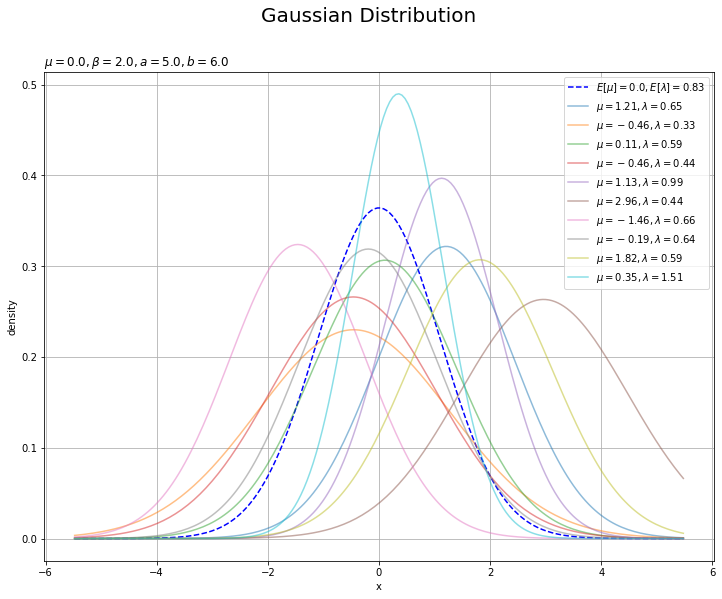

In [33]:
# サンプルによる分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, E_dens, color='blue', linestyle='--', 
         label='$E[\mu]=' + str(E_mu) + ', E[\lambda]=' + str(np.round(E_lambda, 2)) + '$') # 期待値による分布
for n in range(N):
    tmp_dens = norm.pdf(x=x_vals, loc=mu_n[n], scale=np.sqrt(1.0 / lambda_n[n]))
    plt.plot(x_vals, tmp_dens, alpha=0.5, 
             label='$\mu=' + str(np.round(mu_n[n], 2)) + ', \lambda=' + str(np.round(lambda_n[n], 2)) + '$') # サンプルによる分布
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(m) + ', \\beta=' + str(beta) + 
          ', a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　期待値による分布(破線)を中心に分布しているのを確認できます。  
<br>